Chapter 7  Iteration

This chapter is about iteration, which is the ability to run a block of statements repeatedly. We saw a kind of iteration, using recursion, in Section 5.8. We saw another kind, using a for loop, in Section 4.2. In this chapter we’ll see yet another kind, using a while statement. But first I want to say a little more about variable assignment.
7.1  Reassignment

As you may have discovered, it is legal to make more than one assignment to the same variable. A new assignment makes an existing variable refer to a new value (and stop referring to the old value).


 

In [4]:
x = 5  
x

5

In [5]:
x = 7  
x     

7

The first time we display x, its value is 5; the second time, its value is 7.
Figure 7.1 shows what reassignment looks like in a state diagram.

At this point I want to address a common source of confusion. Because Python uses the equal sign (=) for assignment, it is tempting to interpret a statement like a = b as a mathematical proposition of equality; that is, the claim that a and b are equal. But this interpretation is wrong.

First, equality is a symmetric relationship and assignment is not. For example, in mathematics, if a=7 then 7=a. But in Python, the statement a = 7 is legal and 7 = a is not.

Also, in mathematics, a proposition of equality is either true or false for all time. If a=b now, then a will always equal b. In Python, an assignment statement can make two variables equal, but they don’t have to stay that way:


In [6]:
 a = 5
 b = a    # a and b are now equal
 a = 3    # a and b are no longer equal
 b

5

The third line changes the value of a but does not change the value of b, so they are no longer equal.
Reassigning variables is often useful, but you should use it with caution. If the values of variables change frequently, it can make the code difficult to read and debug.

A common kind of reassignment is an update, where the new value of the variable depends on the old.

In [7]:
x = x + 1


This means “get the current value of x, add one, and then update x with the new value.”

If you try to update a variable that doesn’t exist, you get an error, because Python evaluates the right side before it assigns a value to x:

In [8]:
y = y+1

NameError: name 'y' is not defined

Before you can update a variable, you have to initialize it, usually with a simple assignment:


In [9]:
y = 0
y= y+1

Updating a variable by adding 1 is called an increment; subtracting 1 is called a decrement.

# The while statement

Computers are often used to automate repetitive tasks. Repeating identical or similar tasks without making errors is something that computers do well and people do poorly. In a computer program, repetition is also called iteration.

We have already seen two functions, countdown and print_n, that iterate using recursion. Because iteration is so common, Python provides language features to make it easier. One is the for statement we saw in Section 4.2. We’ll get back to that later.  

Another is the while statement. Here is a version of countdown that uses a while statement:

In [10]:
def countdown(n):
    while n > 0:
        print(n)
        n = n - 1
    print('Blastoff!')

In [11]:
countdown(5)

5
4
3
2
1
Blastoff!


More formally, here is the flow of execution for a while statement:

Determine whether the condition is true or false.
If false, exit the while statement and continue execution at the next statement.
If the condition is true, run the body and then go back to step 1.  

Beware infinite loops!  It can sometimes be difficult to see if a loop will exit or not just by reading it.  

# Break
Sometimes you don’t know it’s time to end a loop until you get half way through the body. In that case you can use the break statement to jump out of the loop.

For example, suppose you want to take input from the user until they type done. You could write:

In [12]:
while True:
    line = input('> ')
    if line == 'done':
        break
    print(line)

print('Done!')

> stuff
stuff
> other stuff
other stuff
> done
Done!


This way of writing while loops is common because you can check the condition anywhere in the loop (not just at the top) and you can express the stop condition affirmatively (“stop when this happens”) rather than negatively (“keep going until that happens”).

# Continue
Another flow control command is continue.  Continue will immediately skip the rest of the indented block, return to the top of the while loop and check the condition again. 

In [15]:
keep_going = True

while(keep_going):
    keep_going = False
    continue
    while(True):
        pass #this portion would be an infinite loop...but
        #thankfully it never gets there because of continue

# 7.5 Square roots  
Loops are often used in programs that compute numerical results by starting with an approximate answer and iteratively improving it.

For example, one way of computing square roots is Newton’s method. Suppose that you want to know the square root of a. If you start with almost any estimate, x, you can compute a better estimate with the following formula:

y = (x + a/x)/2
 



In [16]:
#For example, if a is 4 and x is 3:
a = 4
x = 3
y = (x + a/x) / 2
y

2.1666666666666665

In [17]:
#The result is closer to the correct answer (√4 = 2). If we repeat the process 
#with the new estimate, it gets even closer:
x = y
y = (x + a/x) / 2
y

2.0064102564102564

In [21]:
#After a few more updates, the estimate is almost exact:
x = y
y = (x + a/x) / 2

x = y
y = (x + a/x) / 2
y

2.0

In [22]:
#When y == x, we can stop. Here is a loop that starts 
#with an initial estimate, x,
#and improves it until it stops changing:


####This is the loop you'll need in exercise 1###
while True:
    print(x)
    y = (x + a/x) / 2
    if y == x:
        break
    x = y

2.0


For most values of a this works fine, but in general it is dangerous to test float equality. Floating-point values are only approximately right: most rational numbers, like 1/3, and irrational numbers, like √2, can’t be represented exactly with a float.
Rather than checking whether x and y are exactly equal, it is safer to use the built-in function abs to compute the absolute value, or magnitude, of the difference between them:

    



In [ ]:
#replacing if y == x with
if abs(y-x) < epsilon:
        break
#Where epsilon has a value like 0.0000001 that #
#determines how close is close enough.

# 7.6  Algorithms

Newton’s method is an example of an algorithm: it is a mechanical process for solving a category of problems (in this case, computing square roots).

To understand what an algorithm is, it might help to start with something that is not an algorithm. When you learned to multiply single-digit numbers, you probably memorized the multiplication table. In effect, you memorized 100 specific solutions. That kind of knowledge is not algorithmic.

But if you were “lazy”, you might have learned a few tricks. For example, to find the product of n and 9, you can write n−1 as the first digit and 10−n as the second digit. This trick is a general solution for multiplying any single-digit number by 9. That’s an algorithm!

Similarly, the techniques you learned for addition with carrying, subtraction with borrowing, and long division are all algorithms. One of the characteristics of algorithms is that they do not require any intelligence to carry out. They are mechanical processes where each step follows from the last according to a simple set of rules.

Executing algorithms is boring, but designing them is interesting, intellectually challenging, and a central part of computer science.

Some of the things that people do naturally, without difficulty or conscious thought, are the hardest to express algorithmically. Understanding natural language is a good example. We all do it, but so far no one has been able to explain how we do it, at least not in the form of an algorithm.


In [13]:
# Practice




# Exercises

In [23]:
#Exercise 1


In [24]:
# Ex 2

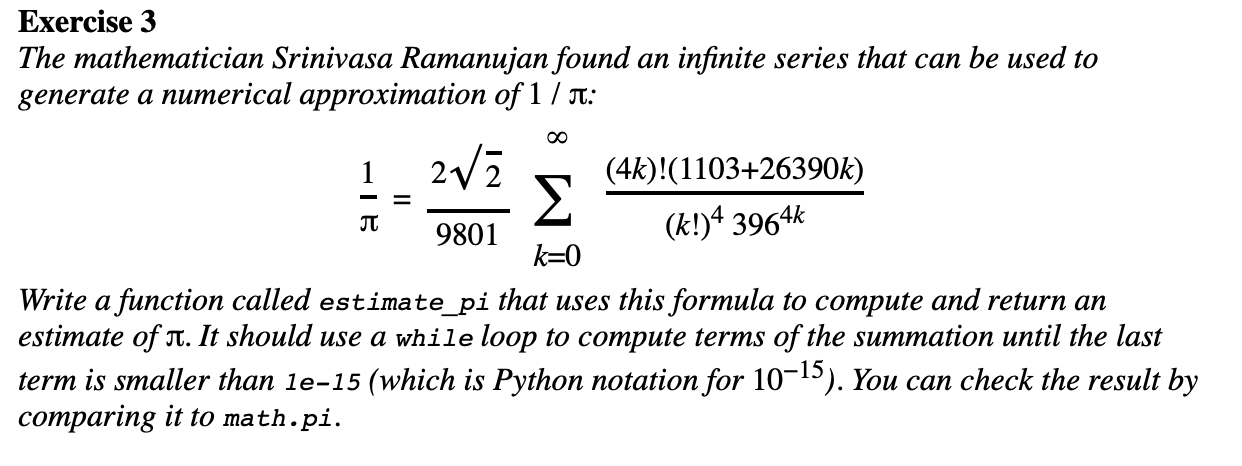

In [ ]:
#Ex 3